In [1]:
pip install -U ppscore

In [23]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns

In [3]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [4]:
#eξερεύνηση συνόλου δεδομένων
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [7]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [9]:
#μόνο αριθμητικές τιμές
num_dataset = dataset.select_dtypes(include=[np.number])

In [10]:
#εύρεση Predictive Power Score
pps.predictors(num_dataset, "legitimate")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Characteristics,legitimate,0.806129,regression,True,mean absolute error,0.3062,0.059363,DecisionTreeRegressor()
1,ResourcesMaxEntropy,legitimate,0.760585,regression,True,mean absolute error,0.3062,0.073309,DecisionTreeRegressor()
2,ResourcesMinEntropy,legitimate,0.741368,regression,True,mean absolute error,0.3062,0.079193,DecisionTreeRegressor()
3,ResourcesMaxSize,legitimate,0.735959,regression,True,mean absolute error,0.3062,0.080849,DecisionTreeRegressor()
4,ImageBase,legitimate,0.713044,regression,True,mean absolute error,0.3062,0.087866,DecisionTreeRegressor()
5,ResourcesMeanSize,legitimate,0.686923,regression,True,mean absolute error,0.3062,0.095864,DecisionTreeRegressor()
6,SectionsMinVirtualsize,legitimate,0.682876,regression,True,mean absolute error,0.3062,0.097103,DecisionTreeRegressor()
7,VersionInformationSize,legitimate,0.678588,regression,True,mean absolute error,0.3062,0.098416,DecisionTreeRegressor()
8,SectionsMinEntropy,legitimate,0.674566,regression,True,mean absolute error,0.3062,0.099648,DecisionTreeRegressor()
9,SectionsMaxEntropy,legitimate,0.656425,regression,True,mean absolute error,0.3062,0.105203,DecisionTreeRegressor()


<Axes: xlabel='ppscore', ylabel='x'>

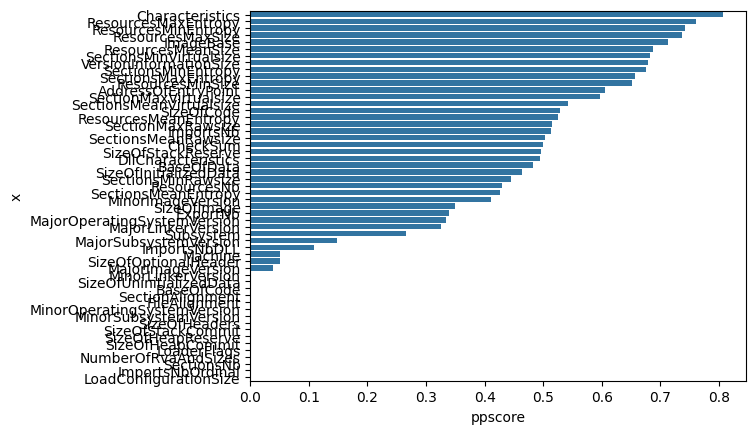

In [21]:
predictors_df = pps.predictors(num_dataset, y="legitimate")
sns.barplot(data=predictors_df, x="ppscore", y="x")

# Συμπεράσματα
Οι στήλες MinorLinkerVersion,SizeOfUninitializedData,BaseOfCode,SectionAlignment,FileAlignment,MinorOperatingSystemVersion,MinorSubsystemVersion,SizeOfHeaders,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,ImportsNbOrdinal,LoadConfigurationSize	έχουν σκορ 0 οπότε δεν συμμετέχουν στο αποτέλεσμα. Επιπλέον οι στήλες Machine,SizeOfOptionalHeader,MajorImageVersion έχουν πολύ μικρό σκορ και θα μπορούσαν να αφαιρεθούν. Με βάση τα παραπάνω η επιλογη χαρακτηριστικών θα εφαρμοζόταν στις εναπομείναντες στήλες που φαίνεται ότι έχουν παραπάνω επίδραση στο αποτέλεσματα. Η στήλη με τη μεγαλύτερη επίδραση είναι η Characteristics.